<a href="https://colab.research.google.com/github/nickcanoy/PSMDSRC103_SY20252026A/blob/main/7_2_DataCollection_Tru_API_CanoyNick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#RODENICK CANOY DataCollection Through API | 103-Programming

In [ ]:
#Load the File

import pandas as pd

# Load the downloaded NYC temperature data
df = pd.read_csv('nyc_temperatures.csv')

# Quick check
print(df.head())
print(df.info())

  attributes datatype                 date            station  value
0      H,,S,     TAVG  2018-10-01T00:00:00  GHCND:USW00014732   21.2
1   ,,W,2400     TMAX  2018-10-01T00:00:00  GHCND:USW00014732   25.6
2   ,,W,2400     TMIN  2018-10-01T00:00:00  GHCND:USW00014732   18.3
3      H,,S,     TAVG  2018-10-02T00:00:00  GHCND:USW00014732   22.7
4   ,,W,2400     TMAX  2018-10-02T00:00:00  GHCND:USW00014732   26.1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   attributes  93 non-null     object 
 1   datatype    93 non-null     object 
 2   date        93 non-null     object 
 3   station     93 non-null     object 
 4   value       93 non-null     float64
dtypes: float64(1), object(4)
memory usage: 3.8+ KB
None


In [ ]:
# filepath /content/nyc_temperatures.csv

In [ ]:
#Check the Data

df['date'] = pd.to_datetime(df['date'])
print(df.dtypes)

attributes            object
datatype              object
date          datetime64[ns]
station               object
value                float64
dtype: object


In [ ]:
#Pivot the Data

pivot_df = df.pivot(index='date', columns='datatype', values='value')
print(pivot_df.head())

datatype    TAVG  TMAX  TMIN
date                        
2018-10-01  21.2  25.6  18.3
2018-10-02  22.7  26.1  19.4
2018-10-03  21.8  25.0  18.9
2018-10-04  21.3  26.1  17.8
2018-10-05  20.3  22.8  16.1


In [ ]:
#Calculate Daily Temperature Range

pivot_df['temp_range'] = pivot_df['TMAX'] - pivot_df['TMIN']
print(pivot_df[['TMAX', 'TMIN', 'temp_range']].head())

datatype    TMAX  TMIN  temp_range
date                              
2018-10-01  25.6  18.3         7.3
2018-10-02  26.1  19.4         6.7
2018-10-03  25.0  18.9         6.1
2018-10-04  26.1  17.8         8.3
2018-10-05  22.8  16.1         6.7


In [ ]:
#Summary Statistics

summary_stats = pivot_df[['TMIN', 'TMAX', 'TAVG']].describe()
print(summary_stats)

datatype       TMIN       TMAX       TAVG
count     31.000000  31.000000  31.000000
mean      12.216129  18.712903  15.296774
std        5.596195   5.795558   5.351852
min        5.600000  10.000000   7.300000
25%        7.200000  13.600000  10.850000
50%        9.400000  17.800000  13.200000
75%       18.050000  23.900000  21.050000
max       21.700000  27.800000  23.800000


In [ ]:
#Filter Specific Data

filtered = pivot_df.loc['2018-10-15':'2018-10-20']
print(filtered)

datatype    TAVG  TMAX  TMIN  temp_range
date                                    
2018-10-15  15.8  21.1  12.8         8.3
2018-10-16  14.3  16.7   9.4         7.3
2018-10-17  13.2  17.8   8.9         8.9
2018-10-18   9.6  11.7   6.7         5.0
2018-10-19  11.3  17.2   7.2        10.0
2018-10-20  15.0  18.3  12.2         6.1


In [ ]:
#Save Clean Data

pivot_df.to_csv('nyc_temperatures_cleaned.csv')

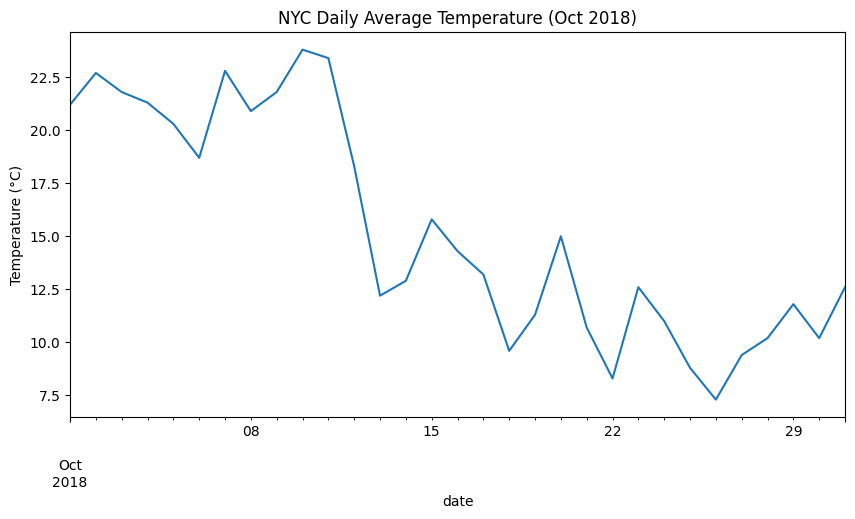

In [ ]:
#Daily Average Temperature

import matplotlib.pyplot as plt

pivot_df['TAVG'].plot(title='NYC Daily Average Temperature (Oct 2018)', figsize=(10,5))
plt.ylabel('Temperature (°C)')
plt.show()